In [2]:
# Import statements
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.8.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

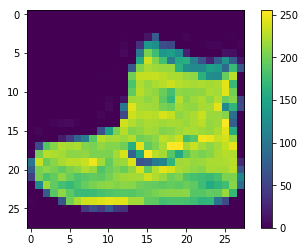

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

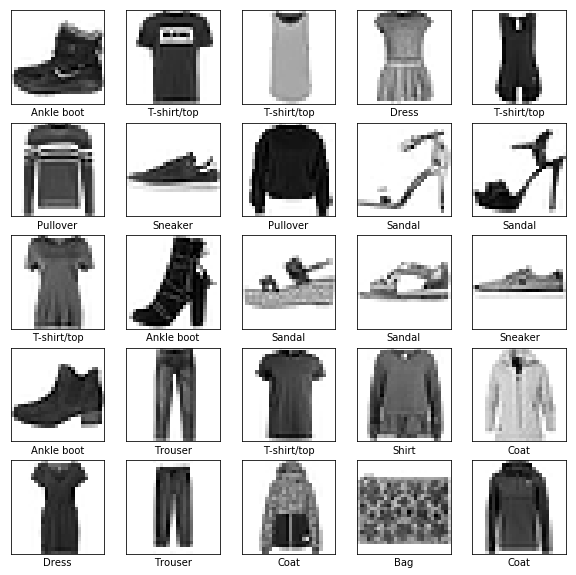

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3900 - acc: 0.8612
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3861 - acc: 0.8635
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.3818 - acc: 0.8646
Epoch 4/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3776 - acc: 0.8667
Epoch 5/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.3748 - acc: 0.8663


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc, 'Test loss:', test_loss)

10000/10000 [==============================] - 0s 42us/step
Test accuracy: 0.8513 Test loss: 0.41483434224128723


In [24]:
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([1.94065251e-07, 1.07742961e-08, 3.71211422e-06, 1.07094809e-06,
       5.66878452e-06, 1.04976684e-01, 5.29204317e-06, 1.62486762e-01,
       3.67862615e-03, 7.28841960e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

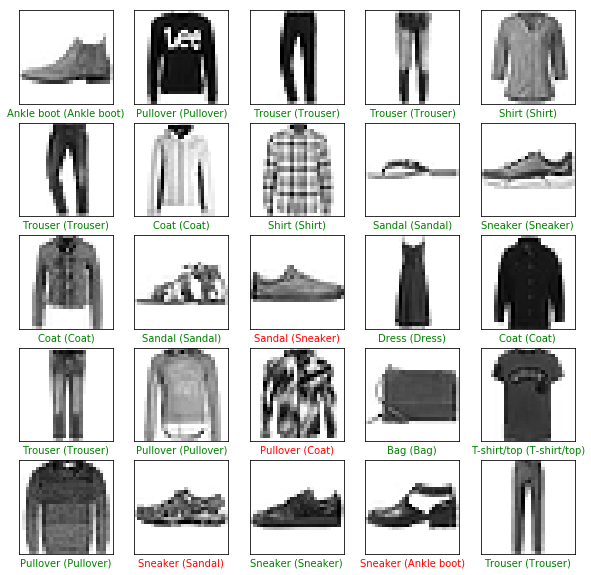

In [29]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      

In [30]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [31]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions = model.predict(img)

print(predictions)

[[1.9406491e-07 1.0774297e-08 3.7121147e-06 1.0709482e-06 5.6687800e-06
  1.0497664e-01 5.2920436e-06 1.6248676e-01 3.6786299e-03 7.2884202e-01]]


In [33]:
np.argmax(predictions[0])

9